In [1]:
import numpy as np
import pandas as pd

from algorithm.util.directed_graph import DirectedGraph
from algorithm.util.read_pairs_data import read_data_db
from algorithm.util.graph_vis import GraphVisualization
from algorithm.edmonds import EdmondsAlgorithm
from algorithm.first_accept_n_way import FirstAcceptNWay
from algorithm.priority_based_n_way import PriorityBasedNWay

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

import time

In [2]:
edmond_matches = []
first_accept_matches3 = []
first_accept_matches10 = []
priority_based3 = []
priority_based10 = []
priority_based3g = []
priority_based10g = []

edmond_time = []
fa3_time = []
fa10_time = []
pb3i_time = []
pb10i_time = []
pb3g_time = []
pb10g_time = []

for i in range(1, 31):
    date_data = "2021_01_" + str(i).zfill(2)
    pairs_data = read_data_db(date_data)
    grph = DirectedGraph(pairs_data)
    
    # Benchmark = Edmond's Algorithm
    start = time.time()
    edmond = EdmondsAlgorithm(priority_threshold=100)
    edmond.finalize_exchange(grph)
    edmond_matches.append(edmond.get_num_of_matched_pairs())
    edmond_end = time.time()
    edmond_time.append(1000*(edmond_end - start))
    
    # First Accept N Way with n = 3
    fanway3 = FirstAcceptNWay(3, 'maximum')
    fanway3.finalize_exchange(grph)
    first_accept_matches3.append(fanway3.get_num_of_matched_pairs())
    fa3_end = time.time()
    fa3_time.append(1000*(fa3_end - edmond_end))
    
    # First Accept N Way with n = 10
    fanway10 = FirstAcceptNWay(10, 'maximum')
    fanway10.finalize_exchange(grph)
    first_accept_matches10.append(fanway10.get_num_of_matched_pairs())
    fa10_end = time.time()
    fa10_time.append(1000*(fa10_end - fa3_end))
    
    # Priority Based N Way with n = 3 and infrequent priority
    pbnway3 = PriorityBasedNWay(3, 'maximum', 'infrequent')
    pbnway3.finalize_exchange(grph)
    priority_based3.append(pbnway3.get_num_of_matched_pairs())
    pb3i_end = time.time()
    pb3i_time.append(1000*(pb3i_end - fa10_end))
    
    # Priority Based N Way with n = 10 and infrequent priority
    pbnway10 = PriorityBasedNWay(10, 'maximum', 'infrequent')
    pbnway10.finalize_exchange(grph)
    priority_based10.append(pbnway10.get_num_of_matched_pairs())
    pb10i_end = time.time()
    pb10i_time.append(1000*(pb10i_end - pb3i_end))
    
    # Priority Based N Way with n = 3 and greedy priority
    pbnway3g = PriorityBasedNWay(3, 'maximum', 'greedy')
    pbnway3g.finalize_exchange(grph)
    priority_based3g.append(pbnway3.get_num_of_matched_pairs())
    pb3g_end = time.time()
    pb3g_time.append(1000*(pb3g_end - pb10i_end))
    
    # Priority Based N Way with n = 10 and greedy priority
    pbnway10g = PriorityBasedNWay(10, 'maximum', 'greedy')
    pbnway10g.finalize_exchange(grph)
    priority_based10g.append(pbnway3.get_num_of_matched_pairs())
    pb10g_end = time.time()
    pb10g_time.append(1000*(pb10g_end - pb3g_end))

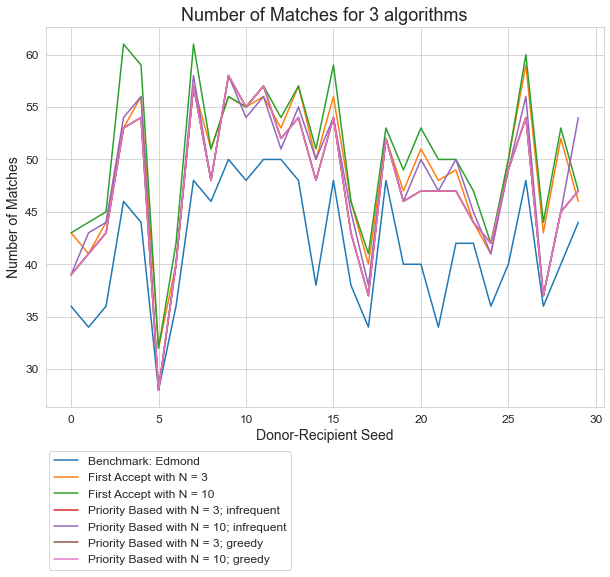

In [35]:
plt.figure(figsize=(10, 7))

plt.title("Number of Matches for 3 algorithms", fontsize=18)
plt.xlabel("Donor-Recipient Seed", fontsize=14)
plt.ylabel("Number of Matches", fontsize=14)

plt.plot(edmond_matches, label='Benchmark: Edmond')
plt.plot(first_accept_matches3, label='First Accept with N = 3')
plt.plot(first_accept_matches10, label='First Accept with N = 10')
plt.plot(priority_based3, label='Priority Based with N = 3; infrequent')
plt.plot(priority_based10, label='Priority Based with N = 10; infrequent')
plt.plot(priority_based3g, label='Priority Based with N = 3; greedy')
plt.plot(priority_based10g, label='Priority Based with N = 10; greedy')

plt.legend(bbox_to_anchor=(0.45, -0.1), fontsize=12)
plt.tick_params(labelsize=12)

In [36]:
# find average execution time of 50 times execution

edmond_time_accumulative = {}
fa3_time_accumulative = {}
fa10_time_accumulative = {}
pb3i_time_accumulative = {}
pb10i_time_accumulative = {}
pb3g_time_accumulative = {}
pb10g_time_accumulative = {}

for i in range(1, 31):
    edmond_time = []
    fa3_time = []
    fa10_time = []
    pb3i_time = []
    pb10i_time = []
    pb3g_time = []
    pb10g_time = []
    for _ in range(50):
        date_data = "2021_01_" + str(i).zfill(2)
        pairs_data = read_data_db(date_data)
        grph = DirectedGraph(pairs_data)

        # Benchmark = Edmond's Algorithm
        start = time.time()
        edmond = EdmondsAlgorithm(priority_threshold=100)
        edmond.finalize_exchange(grph)
        edmond_end = time.time()
        edmond_time.append(1000*(edmond_end - start))

        # First Accept N Way with n = 3
        fanway3 = FirstAcceptNWay(3, 'maximum')
        fanway3.finalize_exchange(grph)
        fa3_end = time.time()
        fa3_time.append(1000*(fa3_end - edmond_end))

        # First Accept N Way with n = 10
        fanway10 = FirstAcceptNWay(10, 'maximum')
        fanway10.finalize_exchange(grph)
        fa10_end = time.time()
        fa10_time.append(1000*(fa10_end - fa3_end))

        # Priority Based N Way with n = 3 and infrequent priority
        pbnway3 = PriorityBasedNWay(3, 'maximum', 'infrequent')
        pbnway3.finalize_exchange(grph)
        pb3i_end = time.time()
        pb3i_time.append(1000*(pb3i_end - fa10_end))

        # Priority Based N Way with n = 10 and infrequent priority
        pbnway10 = PriorityBasedNWay(10, 'maximum', 'infrequent')
        pbnway10.finalize_exchange(grph)
        pb10i_end = time.time()
        pb10i_time.append(1000*(pb10i_end - pb3i_end))

        # Priority Based N Way with n = 3 and greedy priority
        pbnway3g = PriorityBasedNWay(3, 'maximum', 'greedy')
        pbnway3g.finalize_exchange(grph)
        pb3g_end = time.time()
        pb3g_time.append(1000*(pb3g_end - pb10i_end))

        # Priority Based N Way with n = 10 and greedy priority
        pbnway10g = PriorityBasedNWay(10, 'maximum', 'greedy')
        pbnway10g.finalize_exchange(grph)
        pb10g_end = time.time()
        pb10g_time.append(1000*(pb10g_end - pb3g_end))
    
    edmond_time_accumulative[i] = edmond_time
    fa3_time_accumulative[i] = fa3_time
    fa10_time_accumulative[i] = fa10_time
    pb3i_time_accumulative[i] = pb3i_time
    pb10i_time_accumulative[i] = pb10i_time
    pb3g_time_accumulative[i] = pb3g_time
    pb10g_time_accumulative[i] = pb10g_time

In [37]:
# formula to count average of time dict

def average_time(time_dict):
    return [sum(time_dict[x])/len(time_dict[x]) for x in time_dict]

time_df = pd.DataFrame({
    'Benchmark: Edmond': average_time(edmond_time_accumulative),
    'First Accept with N = 3': average_time(fa3_time_accumulative),
    'First Accept with N = 10': average_time(fa10_time_accumulative),
    'Priority Based with N = 3; infrequent': average_time(pb3i_time_accumulative),
    'Priority Based with N = 10; infrequent': average_time(pb10i_time_accumulative),
    'Priority Based with N = 3; greedy': average_time(pb3g_time_accumulative),
    'Priority Based with N = 10; greedy': average_time(pb10g_time_accumulative),
})

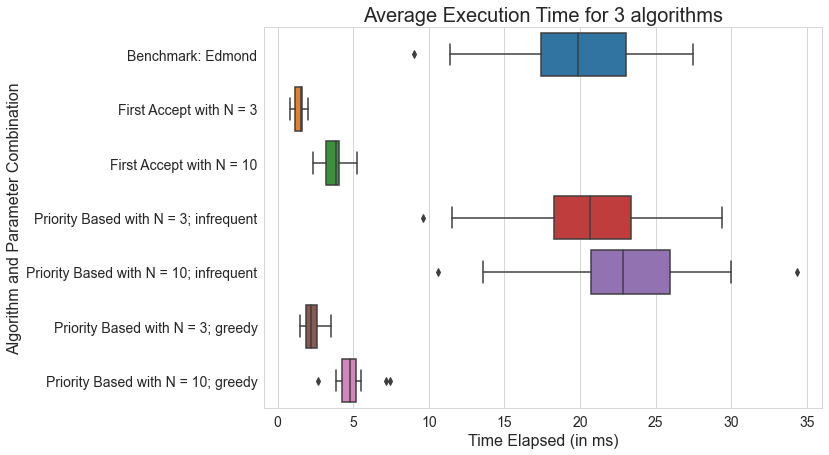

In [38]:
plt.figure(figsize=(10, 7))

plt.title("Average Execution Time for 3 algorithms", fontsize=20)

sns.boxplot(x="value", y="variable", data=pd.melt(time_df))

plt.ylabel("Algorithm and Parameter Combination", fontsize=16)
plt.xlabel("Time Elapsed (in ms)", fontsize=16)
plt.tick_params(labelsize=14)

plt.show()

In [7]:
# First Accept

different_n_0200_0299 = []
different_n_1000_1099 = []
different_n_1500_1599 = []
different_n_2100_2199 = []
different_n_2900_2999 = []

different_e_0200_0299 = []
different_e_1000_1099 = []
different_e_1500_1599 = []
different_e_2100_2199 = []
different_e_2900_2999 = []

pairs_data0 = read_data_db("2021_01_04")
grph0 = DirectedGraph(pairs_data0)

pairs_data1 = read_data_db("2021_01_11")
grph1 = DirectedGraph(pairs_data1)

pairs_data2 = read_data_db("2021_01_16")
grph2 = DirectedGraph(pairs_data2)

pairs_data3 = read_data_db("2021_01_22")
grph3 = DirectedGraph(pairs_data3)

pairs_data4 = read_data_db("2021_01_30")
grph4 = DirectedGraph(pairs_data4)

for n in range(2, 15):
    fanway0 = FirstAcceptNWay(n, 'maximum')
    fanway0.finalize_exchange(grph0)
    different_n_0200_0299.append(fanway0.get_num_of_matched_pairs())
    
    fanway1 = FirstAcceptNWay(n, 'maximum')
    fanway1.finalize_exchange(grph1)
    different_n_1000_1099.append(fanway1.get_num_of_matched_pairs())
    
    fanway2 = FirstAcceptNWay(n, 'maximum')
    fanway2.finalize_exchange(grph2)
    different_n_1500_1599.append(fanway2.get_num_of_matched_pairs())
    
    fanway3 = FirstAcceptNWay(n, 'maximum')
    fanway3.finalize_exchange(grph3)
    different_n_2100_2199.append(fanway3.get_num_of_matched_pairs())  
    
    fanway4 = FirstAcceptNWay(n, 'maximum')
    fanway4.finalize_exchange(grph4)
    different_n_2900_2999.append(fanway4.get_num_of_matched_pairs())
    
    fanwaye1 = FirstAcceptNWay(n, 'exact')
    fanwaye1.finalize_exchange(grph0)
    different_e_0200_0299.append(fanwaye1.get_num_of_matched_pairs())
    
    fanway5 = FirstAcceptNWay(n, 'exact')
    fanway5.finalize_exchange(grph1)
    different_e_1000_1099.append(fanway5.get_num_of_matched_pairs())
    
    fanway6 = FirstAcceptNWay(n, 'exact')
    fanway6.finalize_exchange(grph2)
    different_e_1500_1599.append(fanway6.get_num_of_matched_pairs())
    
    fanway7 = FirstAcceptNWay(n, 'exact')
    fanway7.finalize_exchange(grph3)
    different_e_2100_2199.append(fanway7.get_num_of_matched_pairs())  
    
    fanway8 = FirstAcceptNWay(n, 'exact')
    fanway8.finalize_exchange(grph4)
    different_e_2900_2999.append(fanway8.get_num_of_matched_pairs())

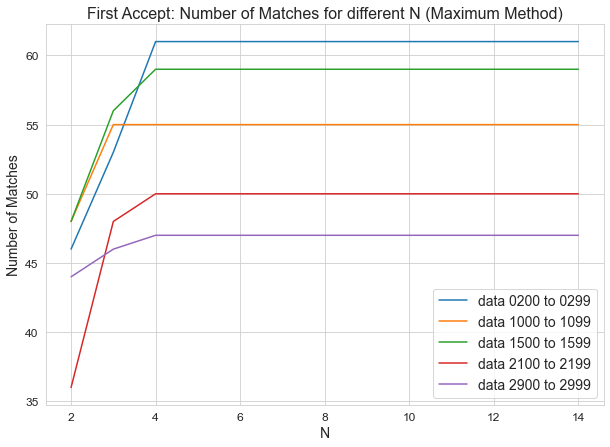

In [26]:
plt.figure(figsize=(10, 7))

plt.title("First Accept: Number of Matches for different N (Maximum Method)", fontsize=16)
plt.xlabel("N", fontsize=14)
plt.ylabel("Number of Matches", fontsize=14)

sns.lineplot(y=different_n_0200_0299, x=range(2,15))
sns.lineplot(y=different_n_1000_1099, x=range(2,15))
sns.lineplot(y=different_n_1500_1599, x=range(2,15))
sns.lineplot(y=different_n_2100_2199, x=range(2,15))
sns.lineplot(y=different_n_2900_2999, x=range(2,15))

plt.legend([
    "data 0200 to 0299",
    "data 1000 to 1099",
    "data 1500 to 1599",
    "data 2100 to 2199",
    "data 2900 to 2999"
], fontsize=14)
plt.tick_params(labelsize=12)

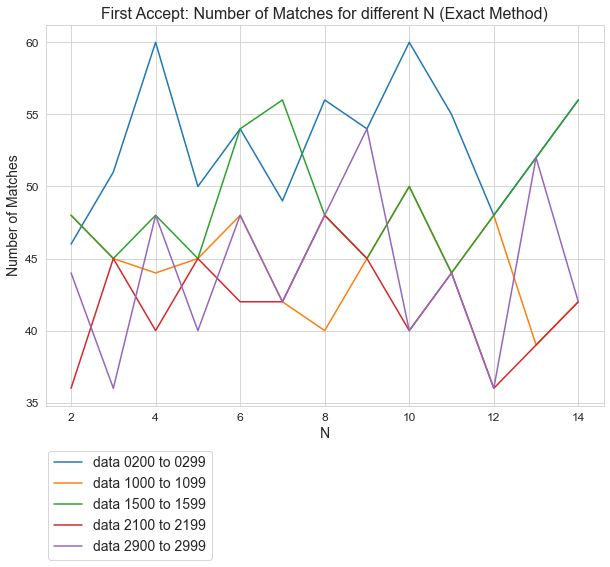

In [29]:
plt.figure(figsize=(10, 7))

plt.title("First Accept: Number of Matches for different N (Exact Method)", fontsize=16)
plt.xlabel("N", fontsize=14)
plt.ylabel("Number of Matches", fontsize=14)


sns.lineplot(y=different_e_0200_0299, x=range(2,15))
sns.lineplot(y=different_e_1000_1099, x=range(2,15))
sns.lineplot(y=different_e_1500_1599, x=range(2,15))
sns.lineplot(y=different_e_2100_2199, x=range(2,15))
sns.lineplot(y=different_e_2900_2999, x=range(2,15))

plt.legend([
    "data 0200 to 0299",
    "data 1000 to 1099",
    "data 1500 to 1599",
    "data 2100 to 2199",
    "data 2900 to 2999"
], fontsize=14, bbox_to_anchor=(0.31, -0.1))
plt.tick_params(labelsize=12)

In [12]:
# Priority Based - Greedy

pb_different_n_0200_0299 = []
pb_different_n_1000_1099 = []
pb_different_n_1500_1599 = []
pb_different_n_2100_2199 = []
pb_different_n_2900_2999 = []

pairs_data0 = read_data_db("2021_01_04")
grph0 = DirectedGraph(pairs_data0)

pairs_data1 = read_data_db("2021_01_11")
grph1 = DirectedGraph(pairs_data1)

pairs_data2 = read_data_db("2021_01_16")
grph2 = DirectedGraph(pairs_data2)

pairs_data3 = read_data_db("2021_01_21")
grph3 = DirectedGraph(pairs_data3)

pairs_data4 = read_data_db("2021_01_30")
grph4 = DirectedGraph(pairs_data4)

for n in range(2, 15):
    pbnway0 = PriorityBasedNWay(n, 'maximum', 'greedy')
    pbnway0.finalize_exchange(grph0)
    pb_different_n_0200_0299.append(pbnway0.get_num_of_matched_pairs())
    
    pbnway1 = PriorityBasedNWay(n, 'maximum', 'greedy')
    pbnway1.finalize_exchange(grph1)
    pb_different_n_1000_1099.append(pbnway1.get_num_of_matched_pairs())
    
    pbnway2 = PriorityBasedNWay(n, 'maximum', 'greedy')
    pbnway2.finalize_exchange(grph2)
    pb_different_n_1500_1599.append(pbnway2.get_num_of_matched_pairs())
    
    pbnway3 = PriorityBasedNWay(n, 'maximum', 'greedy')
    pbnway3.finalize_exchange(grph3)
    pb_different_n_2100_2199.append(pbnway3.get_num_of_matched_pairs())  
    
    pbnway4 = PriorityBasedNWay(n, 'maximum', 'greedy')
    pbnway4.finalize_exchange(grph4)
    pb_different_n_2900_2999.append(pbnway4.get_num_of_matched_pairs())

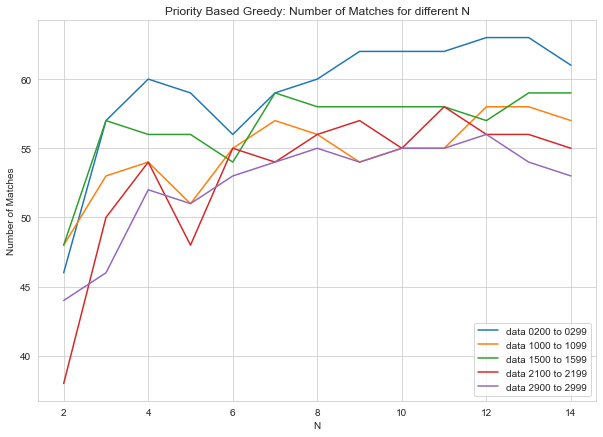

In [13]:
plt.figure(figsize=(10, 7))

plt.title("Priority Based Greedy: Number of Matches for different N")
plt.xlabel("N")
plt.ylabel("Number of Matches")

sns.lineplot(y=pb_different_n_0200_0299, x=range(2,15))
sns.lineplot(y=pb_different_n_1000_1099, x=range(2,15))
sns.lineplot(y=pb_different_n_1500_1599, x=range(2,15))
sns.lineplot(y=pb_different_n_2100_2199, x=range(2,15))
sns.lineplot(y=pb_different_n_2900_2999, x=range(2,15))

plt.legend([
    "data 0200 to 0299",
    "data 1000 to 1099",
    "data 1500 to 1599",
    "data 2100 to 2199",
    "data 2900 to 2999"
])

In [31]:
# Priority Based - Infrequent

pb_different_n_0200_0299 = []
pb_different_n_1000_1099 = []
pb_different_n_1500_1599 = []
pb_different_n_2100_2199 = []
pb_different_n_2900_2999 = []

pairs_data0 = read_data_db("2021_01_04")
grph0 = DirectedGraph(pairs_data0)

pairs_data1 = read_data_db("2021_01_11")
grph1 = DirectedGraph(pairs_data1)

pairs_data2 = read_data_db("2021_01_16")
grph2 = DirectedGraph(pairs_data2)

pairs_data3 = read_data_db("2021_01_21")
grph3 = DirectedGraph(pairs_data3)

pairs_data4 = read_data_db("2021_01_30")
grph4 = DirectedGraph(pairs_data4)

for n in range(2, 15):
    pbnway0 = PriorityBasedNWay(n, 'maximum', 'infrequent')
    pbnway0.finalize_exchange(grph0)
    pb_different_n_0200_0299.append(pbnway0.get_num_of_matched_pairs())
    
    pbnway1 = PriorityBasedNWay(n, 'maximum', 'infrequent')
    pbnway1.finalize_exchange(grph1)
    pb_different_n_1000_1099.append(pbnway1.get_num_of_matched_pairs())
    
    pbnway2 = PriorityBasedNWay(n, 'maximum', 'infrequent')
    pbnway2.finalize_exchange(grph2)
    pb_different_n_1500_1599.append(pbnway2.get_num_of_matched_pairs())
    
    pbnway3 = PriorityBasedNWay(n, 'maximum', 'infrequent')
    pbnway3.finalize_exchange(grph3)
    pb_different_n_2100_2199.append(pbnway3.get_num_of_matched_pairs())  
    
    pbnway4 = PriorityBasedNWay(n, 'maximum', 'infrequent')
    pbnway4.finalize_exchange(grph4)
    pb_different_n_2900_2999.append(pbnway4.get_num_of_matched_pairs())

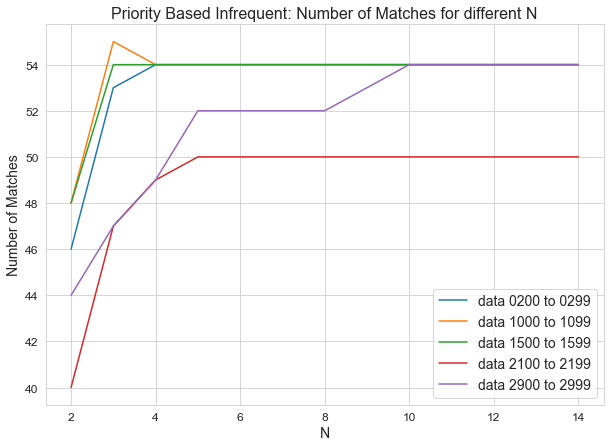

In [32]:
plt.figure(figsize=(10, 7))

plt.title("Priority Based Infrequent: Number of Matches for different N", fontsize=16)
plt.xlabel("N", fontsize=14)
plt.ylabel("Number of Matches", fontsize=14)

sns.lineplot(y=pb_different_n_0200_0299, x=range(2,15))
sns.lineplot(y=pb_different_n_1000_1099, x=range(2,15))
sns.lineplot(y=pb_different_n_1500_1599, x=range(2,15))
sns.lineplot(y=pb_different_n_2100_2199, x=range(2,15))
sns.lineplot(y=pb_different_n_2900_2999, x=range(2,15))

plt.legend([
    "data 0200 to 0299",
    "data 1000 to 1099",
    "data 1500 to 1599",
    "data 2100 to 2199",
    "data 2900 to 2999"
], fontsize=14)
plt.tick_params(labelsize=12)

In [14]:
# First Accept - Maximum vs Exact

fa = {}

for d in ["2021_01_05", "2021_01_15", "2021_01_20", "2021_01_25"]:
    data = read_data_db(d)
    grph = DirectedGraph(data)
    fa[d] = {}
    for n in range(2, 15):
        fa[d][n] = {}
        for g in ['maximum', 'exact']:
            firstaccept = FirstAcceptNWay(n, g)
            firstaccept.finalize_exchange(grph)
            
            fa[d][n][g] = firstaccept.get_num_of_matched_pairs()

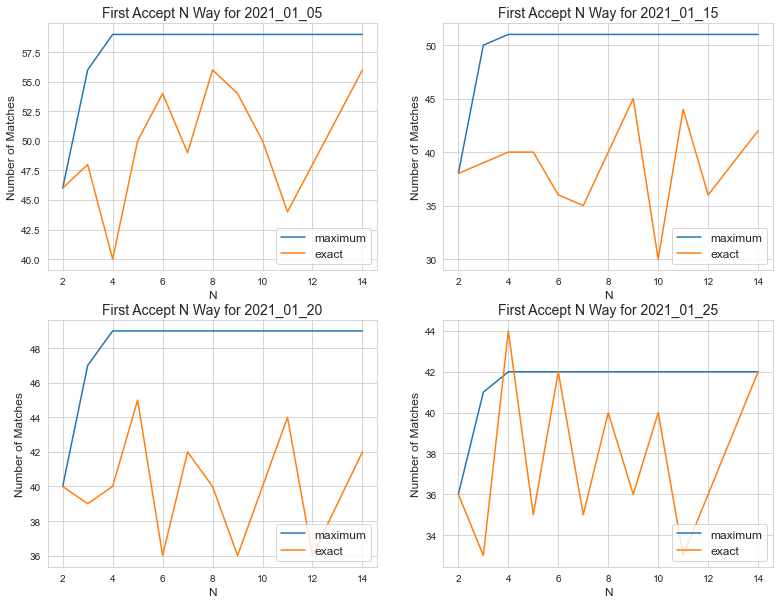

In [33]:
plt.figure(figsize=(13, 10))

for idx, date in enumerate(fa):
    plt.subplot(2, 2, idx+1)
    n = list(fa[date].keys())
    gr = [a['maximum'] for a in fa[date].values()]
    iq = [a['exact'] for a in fa[date].values()]
    plt.title("First Accept N Way for " + date, fontsize=14)
    plt.xlabel("N", fontsize=12)
    plt.ylabel("Number of Matches", fontsize=12)
    
    sns.lineplot(y=gr, x=n)
    sns.lineplot(y=iq, x=n)
    
    plt.legend(['maximum', 'exact'], loc=4, fontsize=12)

In [16]:
# Priority Based - Infrequent vs Greedy

pb = {}

for d in ["2021_01_05", "2021_01_15", "2021_01_20", "2021_01_25"]:
    data = read_data_db(d)
    grph = DirectedGraph(data)
    pb[d] = {}
    for n in range(2, 15):
        pb[d][n] = {}
        for g in ['greedy', 'infrequent']:
            prio = PriorityBasedNWay(n, 'maximum', g)
            prio.finalize_exchange(grph)
            
            pb[d][n][g] = prio.get_num_of_matched_pairs()

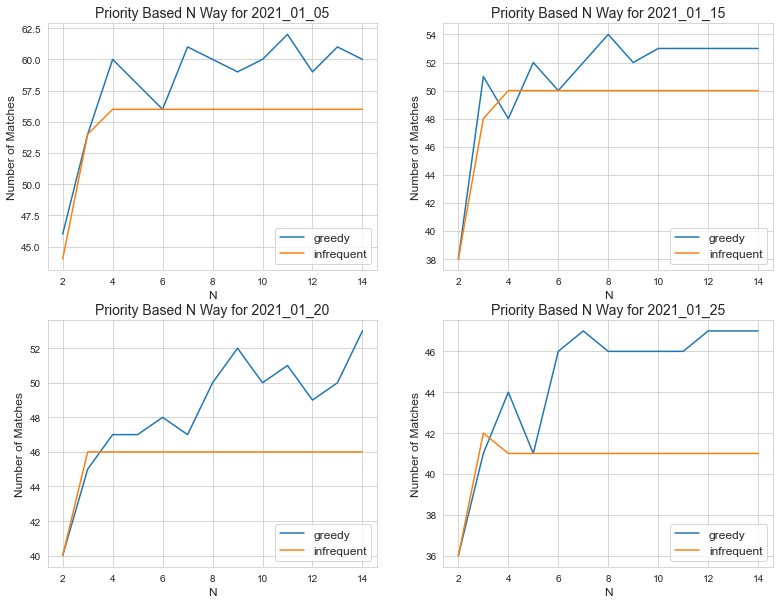

In [34]:
plt.figure(figsize=(13, 10))

for idx, date in enumerate(pb):
    plt.subplot(2, 2, idx+1)
    n = list(pb[date].keys())
    gr = [a['greedy'] for a in pb[date].values()]
    iq = [a['infrequent'] for a in pb[date].values()]
    plt.title("Priority Based N Way for " + date, fontsize=14)
    plt.xlabel("N", fontsize=12)
    plt.ylabel("Number of Matches", fontsize=12)
    
    sns.lineplot(y=gr, x=n)
    sns.lineplot(y=iq, x=n)
    
    plt.legend(['greedy', 'infrequent'], loc=4, fontsize=12)